# MODELO SVM
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from scipy.io import loadmat
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [17]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,1,0,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,...,0,1,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,1,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,1,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,...,1,0,1,0,0,0,0,0,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,1,...,0,1,0,0,0,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,1,...,0,1,0,0,0,0,0,0,1,0
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,0,...,0,1,0,0,0,0,1,0,0,0


In [18]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Earth', 'Europa',
       'Mars', 'Cabin_num', 'Cabin_Side_P', 'Cabin_Side_S', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T']]

In [19]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 22)	y_train: (6085,)
X_test: (2608, 22)	y_test: (2608,)


- **SVC**

In [20]:
# from sklearn import svm

# svc = svm.SVC(C=.1, class_weight='balanced', kernel='rbf')
# svc.fit(X_train, y_train)

# print('MODELO SVC')
# print('Training accuracy = {0}%'.format(np.round(svc.score(X_train, y_train) * 100, 2)))
# print('Test accuracy = {0}%'.format(np.round(svc.score(X_test, y_test) * 100, 2)))

In [21]:
from sklearn.svm import SVC
from sklearn import svm

svc_tr = SVC(C=.1, class_weight='balanced', kernel='rbf')
svc_tr.fit(X_train,y_train)

y_hat_svc = svc_tr.predict(X_test)
y_hat_train_svc = svc_tr.predict(X_train)


print('MODELO SVC')

print('Training accuracy = ',svc_tr.score(X_train, y_train))
print('Test accuracy = ',svc_tr.score(X_test, y_test))


MODELO SVC
Training accuracy =  0.7715694330320461
Test accuracy =  0.7845092024539877


In [22]:
##Matriz de confusion del mejor modelo

import sklearn.metrics as metrics
predictions = svc_tr.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 861  435]
 [ 127 1185]]


Text(0.5, 1.0, 'Matriz de confusión')

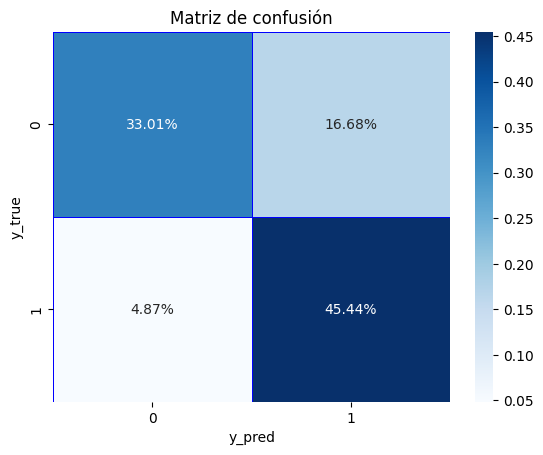

In [23]:
sns.heatmap(cm/np.sum(cm), annot=True, linewidths=0.5,fmt='.2%', cmap='Blues', linecolor="blue")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Matriz de confusión")

## Cargamos los datos de entrada del archivo .csv Test

In [24]:
# Load data

test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,1,0
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,0,...,1,0,0,0,0,0,0,0,1,0
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [25]:
testID = pd.read_csv('../data/Raw/test.csv', sep=',')

In [26]:
prediccion_test = pd.DataFrame(svc_tr.predict(df_test))
prediccion_test['PassengerId'] =testID['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/SVM.csv', index=False)
prediccion_test

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
